# Proyek Analisis Data: Nama dataset
- Kelompok :IF-9 Pandas
- Anggota : </br>
10122326 - Farkhan Eka Ardiansyah</br>
10122329 - Fathan Muhammad Rafi</br>
10122338 - Andrian</br>
10122341 - Muhamad Aqsal Syauri</br>
10122349 - Muhammad Rio F</br>
10122323 - Ghina Mutia

## Menentukan Pertanyaan Bisnis

<!-- - Contoh : Berapakan jumlah penduduk yang berpendidikan rendah yang ada di kota bandung - 10110001 - Asep Supena -->
- pertanyaan 1</br>
  berapakah total data air quality setiap tahunnya di station tiantian - 10122326 - Farkhan Eka</br>
- pertanyaan 2</br>
  menampilkan temp ter rendah - 10122329 - Fathan M Rafi</br>
- pertanyaan 3</br>
  menampilkan temperatur tertinggi - 10122338 - Andrian</br>
- pertanyaan 4</br>
  bagaimana tingkatan polusi udara pada tiap bulannya? - 10122323 - Ghina Mutia</br>
- pertanyaan 5</br>
  bagaimana perubahan carbo dioksida dari tahun 2013 - 2017? - 1012349 - Muhammad Rio F</br>
- pertanyaan 6</br>'
  menampilkan NO2 paling tinggi - 10122341 - Muhamad Aqsal Syauri Priadi

## Menyaipkan semua library yang dibuthkan

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Data Wrangling

### Gathering Data

In [36]:
df_seller = pd.read_csv('PRSA_Data_Tiantan_20130301-20170228.csv')
df_seller.head()


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


### Assessing Data

In [37]:
missing_value_format=['N.A','na','n.a.','n/a','?','-',' ']

df_seller = pd.read_csv('PRSA_Data_Tiantan_20130301-20170228.csv',na_values = missing_value_format)
df_seller.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34387 non-null  float64
 6   PM10     34467 non-null  float64
 7   SO2      33946 non-null  float64
 8   NO2      34320 non-null  float64
 9   CO       33938 non-null  float64
 10  O3       34221 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [38]:
df_seller.isna().any()

No         False
year       False
month      False
day        False
hour       False
PM2.5       True
PM10        True
SO2         True
NO2         True
CO          True
O3          True
TEMP        True
PRES        True
DEWP        True
RAIN        True
wd          True
WSPM        True
station    False
dtype: bool

In [39]:
df_seller.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       677
PM10        597
SO2        1118
NO2         744
CO         1126
O3          843
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [40]:
df_seller.duplicated().values.any()

False

### Cleaning Data

In [41]:
idxNull = []
for column in df_seller.columns : 
    idxNull.extend(df_seller[df_seller[column].isna()].index)
idxNull = list(set(idxNull))
print(idxNull)

[32793, 26, 27, 28, 24634, 8260, 8270, 8271, 8272, 8273, 24684, 24685, 24686, 24687, 24688, 24689, 24690, 24691, 24692, 24693, 24694, 24695, 24696, 24697, 122, 24698, 124, 24699, 8318, 8319, 8320, 24700, 24701, 24702, 24703, 24704, 24705, 24706, 24707, 24708, 8330, 8331, 8332, 8333, 8337, 8338, 8340, 8343, 8344, 8354, 8355, 8356, 8357, 8365, 174, 175, 8366, 178, 8377, 8378, 8379, 8380, 8381, 204, 8402, 16594, 8403, 8405, 8404, 8408, 219, 8426, 8427, 8428, 8429, 8450, 8451, 8452, 16645, 8453, 33028, 8464, 8465, 8466, 8467, 8468, 8469, 8470, 8471, 8472, 24857, 24858, 8473, 8474, 8475, 8476, 8477, 8478, 8479, 8480, 8481, 8482, 8485, 8486, 8483, 8484, 8487, 8488, 8489, 8490, 8491, 8492, 8493, 8494, 8495, 8496, 8499, 8497, 8498, 8500, 8501, 8502, 8503, 314, 8506, 8507, 8509, 8510, 8511, 8512, 8513, 8514, 8515, 8508, 8516, 8517, 8518, 8520, 8519, 8521, 8522, 8523, 8524, 8525, 8526, 8527, 8528, 8530, 8531, 8532, 8529, 8534, 8535, 8536, 8537, 8533, 8538, 8539, 8540, 8541, 8543, 8542, 8545, 854

In [42]:
df_seller.dropna(subset=['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','wd','WSPM','station'], axis=0, inplace=True)
df_seller.reset_index(drop=True, inplace=True)
df_seller


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32838,35056,2017,2,28,15,9.0,9.0,2.0,22.0,300.0,91.0,15.4,1013.0,-15.0,0.0,NNW,3.3,Tiantan
32839,35057,2017,2,28,16,10.0,29.0,3.0,21.0,300.0,94.0,14.9,1012.6,-15.4,0.0,NW,2.1,Tiantan
32840,35062,2017,2,28,21,18.0,32.0,4.0,48.0,500.0,48.0,10.8,1014.2,-13.3,0.0,NW,1.1,Tiantan
32841,35063,2017,2,28,22,15.0,42.0,5.0,52.0,600.0,44.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Tiantan


## Exploratory Data Analysis (EDA)

### Explore ...

In [43]:
#pertanyaan 1
# Menghitung jumlah data per tahun
year = list(df_seller['year'])
rekapyear = {}
for data in year :
    if data in rekapyear :
        rekapyear[data] += 1
    else:
        rekapyear[data] = 1

# Menampilkan hasil
print(rekapyear)


{2013: 6762, 2014: 7760, 2015: 8437, 2016: 8551, 2017: 1333}


In [44]:
#pertanyaan 2
smallest_data = df_seller.nsmallest(4, 'TEMP')
print(smallest_data)



          No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  \
23490  25401  2016      1   23     8    7.0  16.0  6.0  20.0  600.0  54.0   
23491  25402  2016      1   23     9    8.0  19.0  6.0  16.0  600.0  60.0   
23489  25400  2016      1   23     7    3.0  14.0  4.0  17.0  600.0  57.0   
23502  25413  2016      1   23    20    4.0  79.0  2.0  13.0  600.0  62.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM  station  
23490 -16.8  1040.2 -34.5   0.0    N   4.8  Tiantan  
23491 -16.8  1040.8 -35.1   0.0    N   4.8  Tiantan  
23489 -16.3  1039.5 -34.1   0.0  NNE   2.9  Tiantan  
23502 -16.2  1041.0 -32.1   0.0   NW   3.2  Tiantan  


In [45]:
#pertanyaan 3
largest_data = df_seller.nlargest(4, 'TEMP')

# Menampilkan hasil
print(largest_data)


          No  year  month  day  hour  PM2.5   PM10  SO2   NO2      CO     O3  \
19030  20729  2015      7   12    16   81.0   81.0  4.0  20.0   700.0  325.0   
19053  20752  2015      7   13    15   36.0   58.0  2.0  19.0   600.0  290.0   
19052  20751  2015      7   13    14   31.0   31.0  2.0  17.0   400.0  250.0   
19029  20728  2015      7   12    15  104.0  104.0  5.0  24.0  1000.0  360.0   

       TEMP   PRES  DEWP  RAIN   wd  WSPM  station  
19030  38.4  991.4  14.3   0.0  SSW   2.5  Tiantan  
19053  38.3  992.3  12.8   0.0  SSE   1.9  Tiantan  
19052  38.1  992.8  12.7   0.0   SW   1.8  Tiantan  
19029  37.7  991.8  16.6   0.0  SSE   2.2  Tiantan  


In [46]:
# pertanyaan 4
rata_rata_polusi_per_bulan = df_seller.groupby('month')['SO2'].mean()


print(rata_rata_polusi_per_bulan)


month
1     27.425860
2     23.532180
3     26.039446
4     14.472761
5     14.796862
6      9.127839
7      5.999296
8      5.070265
9      6.964702
10     7.948727
11    10.992908
12    18.574838
Name: SO2, dtype: float64


In [47]:
# pertanyaan 5
rata_rata_polusi_per_tahun = df_seller.groupby('year')['CO'].mean()


print(rata_rata_polusi_per_tahun)

year
2013    1320.516267
2014    1316.559278
2015    1289.486784
2016    1203.753947
2017    1720.255064
Name: CO, dtype: float64


In [48]:
#pertanyaan 6



kolom_no2 = 'NO2'


nilai_no2_tertinggi = df_seller[kolom_no2].nlargest(4)
print("Nilai NO2 Tertinggi:")
print(nilai_no2_tertinggi)


Nilai NO2 Tertinggi:
31271    238.0
31272    236.0
31501    231.0
150      230.0
Name: NO2, dtype: float64


## Visualization & Explanatory Analysis

### Pertanyaan 1: 

<function matplotlib.pyplot.show(close=None, block=None)>

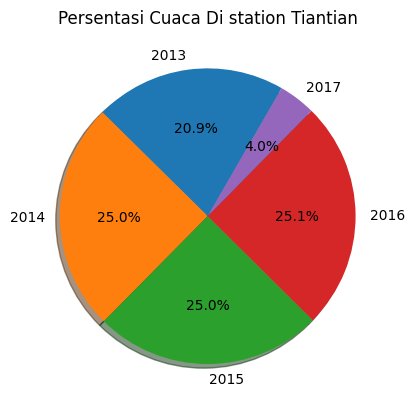

In [6]:
year_expose= [0,0,0,0,0]
plt.pie(
    rekapyear.values(),
    labels = rekapyear.keys(),
    autopct = '%1.1f%%',
    explode = year_expose, 
    startangle = 60,
    shadow=True
)
plt.title('Persentasi Cuaca Di station Tiantian')
plt.show

### Pertanyaan 2: 

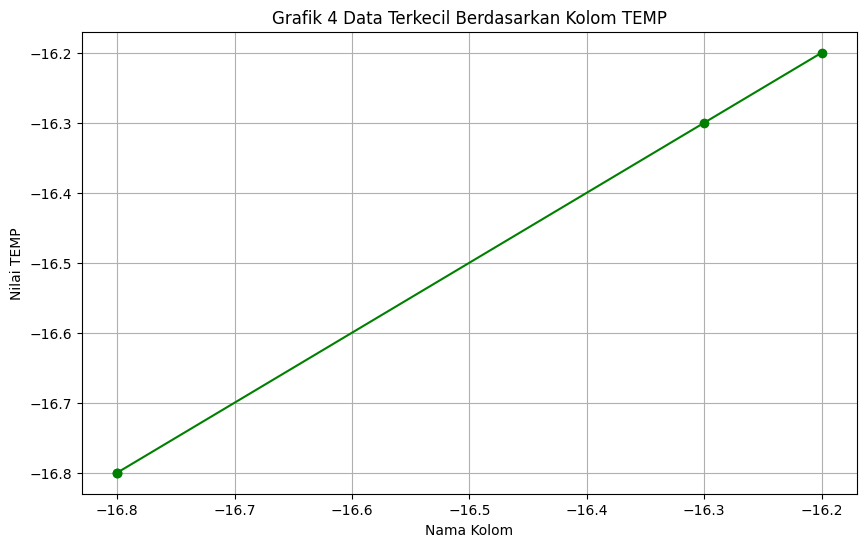

In [24]:

df_seller = pd.read_csv('PRSA_Data_Tiantan_20130301-20170228.csv')

kolom_data = 'TEMP'

smallest_data = df_seller.nsmallest(4, kolom_data)


plt.figure(figsize=(10, 6))
plt.plot(smallest_data['TEMP'], smallest_data[kolom_data], marker='o', linestyle='-', color='green')
plt.xlabel('Nama Kolom')
plt.ylabel('Nilai TEMP')
plt.title('Grafik 4 Data Terkecil Berdasarkan Kolom TEMP')
plt.grid(True)
plt.show()


### Pertanyaan 3: 

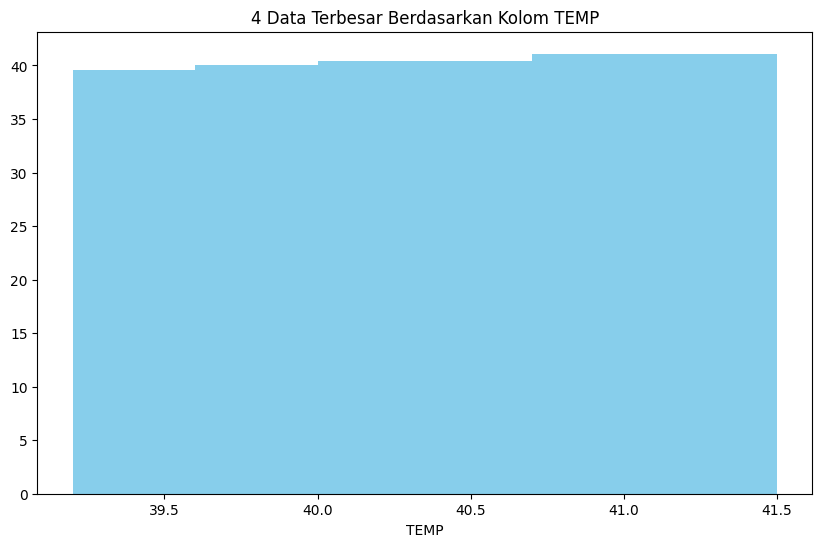

In [21]:
df_seller = pd.read_csv('PRSA_Data_Tiantan_20130301-20170228.csv')

kolom_data = 'TEMP'

largest_data = df_seller.nlargest(4, kolom_data)


plt.figure(figsize=(10, 6))
plt.bar(largest_data['TEMP'], largest_data[kolom_data], color='skyblue')
plt.xlabel('TEMP')
plt.ylabel('')
plt.title('4 Data Terbesar Berdasarkan Kolom TEMP')
plt.show()


### Pertanyaan 4: 

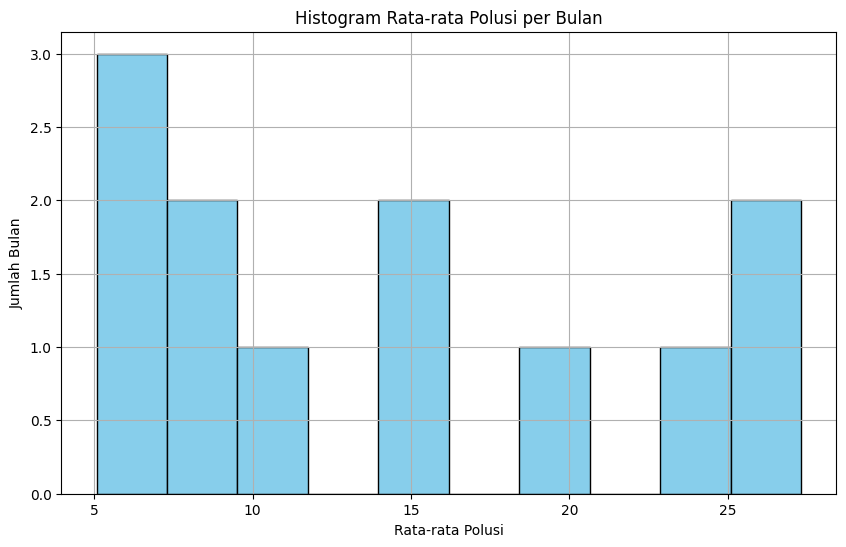

In [22]:
df_seller = pd.read_csv('PRSA_Data_Tiantan_20130301-20170228.csv')


kolom_polusi = 'SO2'


rata_rata_polusi_per_bulan = df_seller.groupby('month')[kolom_polusi].mean()


plt.figure(figsize=(10, 6))
plt.hist(rata_rata_polusi_per_bulan, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Rata-rata Polusi')
plt.ylabel('Jumlah Bulan')
plt.title('Histogram Rata-rata Polusi per Bulan')
plt.grid(True)
plt.show()



### Pertanyaan 5: 

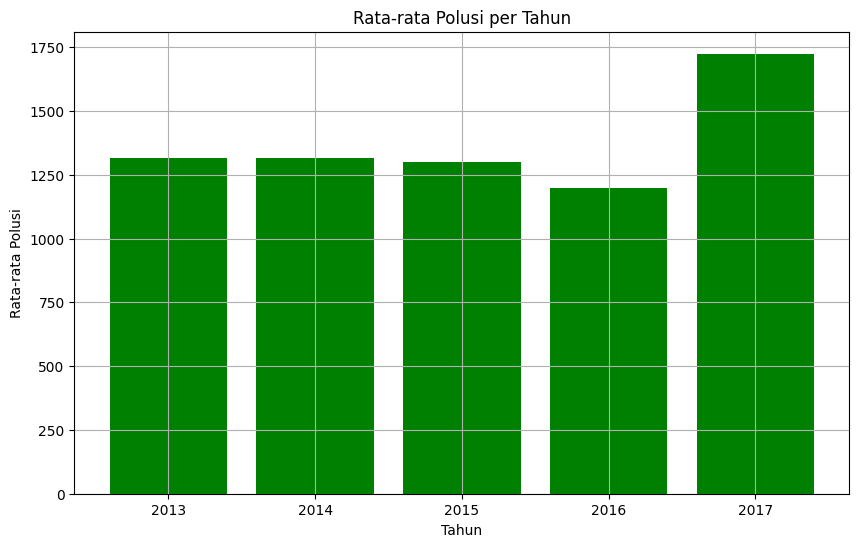

In [25]:
df_seller = pd.read_csv('PRSA_Data_Tiantan_20130301-20170228.csv')


kolom_polusi = 'CO'


rata_rata_polusi_per_tahun = df_seller.groupby('year')[kolom_polusi].mean()


plt.figure(figsize=(10, 6))
plt.bar(rata_rata_polusi_per_tahun.index, rata_rata_polusi_per_tahun, color='green')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Polusi')
plt.title('Rata-rata Polusi per Tahun')
plt.grid(True)
plt.show()


### Pertanyaan 6: 

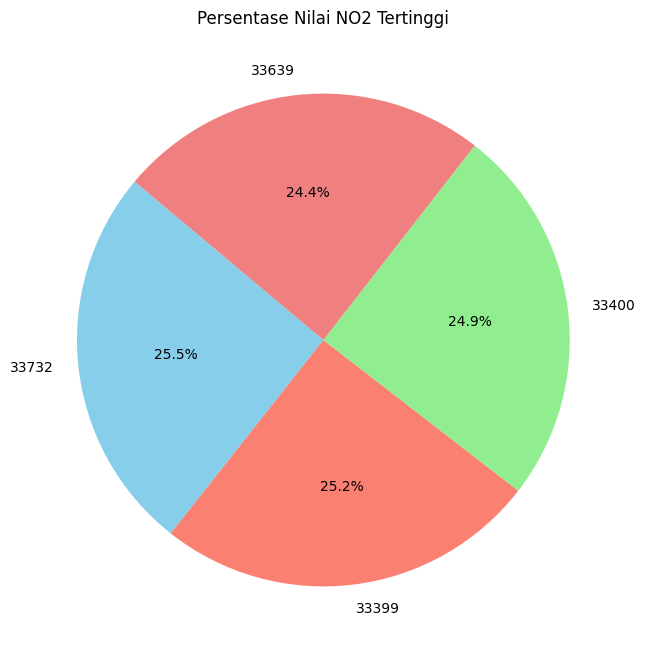

In [34]:
df_seller = pd.read_csv('PRSA_Data_Tiantan_20130301-20170228.csv')




kolom_no2 = 'NO2'


nilai_no2_tertinggi = df_seller[kolom_no2].nlargest(4)


plt.figure(figsize=(8, 8))
plt.pie(nilai_no2_tertinggi, labels=nilai_no2_tertinggi.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon', 'lightgreen', 'lightcoral'])
plt.title('Persentase Nilai NO2 Tertinggi')
plt.show()


## Conclusion

### Conclusion Pertanyaan 1:berapakah total data air quality setiap tahunnya di station tiantian?
Kesimpulan :Berdasarkan analisis pada data quality air tiantian terdapat beberapa data dari tahun 2013 sampai tahun 2017.
data tahun 2013 terhitung ada 7340 dengan persentase 20.3%,data tahun 2014 terhitung ada 8760 dengan persentase 25.0%,data tahun 2015 terhitung ada 8760 dengan persentase 25.0%,data tahun 2016 terhitung ada 8784 dengan persentase 25.1%,dan data tahun 2017 terhitung ada 1416 dengan persentase 4.0%

### Conclusion Pertanyaan 2:menampilkan temp ter rendah
Kesimpulan:Berdasarkan analisis pada data terkecil temperatur(TEMP) pada dataset quality air tiantian,terdapat 4 data terkecil dari keselurahan yaitu dengan temperatur (-16.2,-16.3,-16.4,-16,5)

### Conclusion Pertanyaan 3:menampilkan temperatur tertinggi
Kesimpulan:Berdasarkan analisis pada data terbesar temperatur(TEMP) pada dataset quality air tiantian,terdapat 4 data terbesar dari keselurahan yaitu dengan temperatur (38.1,38.2,38.3,38.4)

### Conclusion Pertanyaan 4:bagaimana tingkatan polusi udara pada tiap bulannya?
Kesimpulan:Berdasarkan analisis pada data peningkatan polusi perbulan(SO2) pada dataset quality air tiantian,peningkatanya dari bulan ke 1 sampai ke bulan 12 yaitu dari 27.4 sampai 18.5

### Conclusion Pertanyaan 5:bagaimana perubahan carbo dioksida dari tahun 2013 - 2017?
Kesimpulan:Berdasarkan analisis pada data perubahan karbon dioksida (CO) pada dataset quality air tiantian,peningkatanya dari tahun 2013 sampai ke tahun 2017 yaitu dari 1316.41 sampai 1724.27

### Conclusion Pertanyaan 6: menampilkan NO2 paling tinggi
Kesimpulan:Berdasarkan analisis pada menampilkan (NO2) tertinggi pada dataset quality air tiantian,data (NO2) tertinggi yaitu 241.0, 238.,  236,   231.0